# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
## will load below libraries and features to streamline our coding experience

!pip install xgboost
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")


# importing common libraries for preprocessing and modeling
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

### Import the Dataset & Take copy ()


In [2]:
visa = pd.read_csv("EasyVisa.csv")
data = visa.copy()


<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

#### Overview and Sanity Checkes


In [3]:
## print first 5 rows and last 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [4]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
## print the shape of the dataset (rows and cols)
print(f" The data has {data.shape[0]} rows  \n And has {data.shape[1]} columns")

 The data has 25480 rows  
 And has 12 columns


<IPython.core.display.Javascript object>

In [6]:
## let's understand data info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

#### Observation,
we can understand from data info the following:
- There are no missing data in the dataset
- Dataset got (1) type float64, (2) int64, and (9) object
- we observe that case_id is an object type and might not add any value so  most likely will dorp it later on.

In [7]:
## let's check for duplicated values, if any!
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [8]:
## let's check five number summaries and other statisticals.
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Observation
- We observe that there are no missing or duplicated case_id in this dataset
- We observe that most of employees are from Asia almost 16861
- We observe that we have 4 unique educational degree which the bachelor is the the most frequent degree in this dataset.
- We observe that experienced employees are more than non experienced i.e. 14802.
- Accordingly no of employees required training are less than who required.
- We observe that there is sign (-) in number of employees which most probably by mistake. so, we should treat it by taking the absolute value of these numbers.
- we observe top region of employment is in northeast out 5 diff region.
- we observe that min prevailing wage is 2.137 per hour and max is 319210 per year, we should recheck that also after unifying the wages units.
- we observe that most of the wages' units is per year.
- we observe that full time employees are more than part time.
- we observe that certfied visa cases are more than denied one.

In [9]:
## As observed earlier, let's get rid of negative sign in emp cols by using abs() func()
# first, let's know number of negative variables
data[data["no_of_employees"] < 0].shape[0]

33

<IPython.core.display.Javascript object>

In [10]:
## Now, let's replace them  with absolute values,using func. abc()

data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [11]:
## let's check again the negative values

data[data["no_of_employees"] < 0].shape[0]

0

<IPython.core.display.Javascript object>

In [12]:
## let's count all unique values in each categrical cols using value count().
# for that, we may create list of cats variables and do forloop by value count().

cats_cols = list(data.select_dtypes("object").columns)

for column in cats_cols:
    print(data[column].value_counts())
    print(f" Total {data[column].value_counts().sum()}")
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
 Total 25480
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
 Total 25480
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
 Total 25480
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
 Total 25480
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
 Total 25480
--------------------------------------------------
Northeast    7195
South        7017
West         6586

<IPython.core.display.Javascript object>

#### Observations
- we observe that Asia is the most frequent continent and Ocenia is the lowest
- we observe that bachelor is the most frequent degree and doctorate is the lowest.
- we observe that no. of experienced employees are higher than non-experienced.
- we observe that no. of employees required training are less than required
- we observe that Northeast is the most frequent region and Island is the lowest.
- we observe that most frequent wage year is per year and lowest is per month
- we observe that full time positions are higher than part time
- we observe that no. of certified visa is higher than denied one.

In [13]:
## as observed earlier that we should drop case_id col, so let's do that now....
data.drop("case_id", axis=1, inplace=True)
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

### Univariate Analysis
- let's do univariate analysis
- for such, we may create below functions to streamline our analysis experience

In [14]:
## creating histogram_boxplot function which will help us visualizing histogram and boxplot together
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

In [15]:
## creating labeled barplots function which will help us visualizing cats. variables
# in terms of identifying freq. or perce.

def labeled_barplot(data, feature, perc=False, n=None):


    total = len(data[feature])  
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height()  

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  
    plt.show()  



<IPython.core.display.Javascript object>

In [16]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

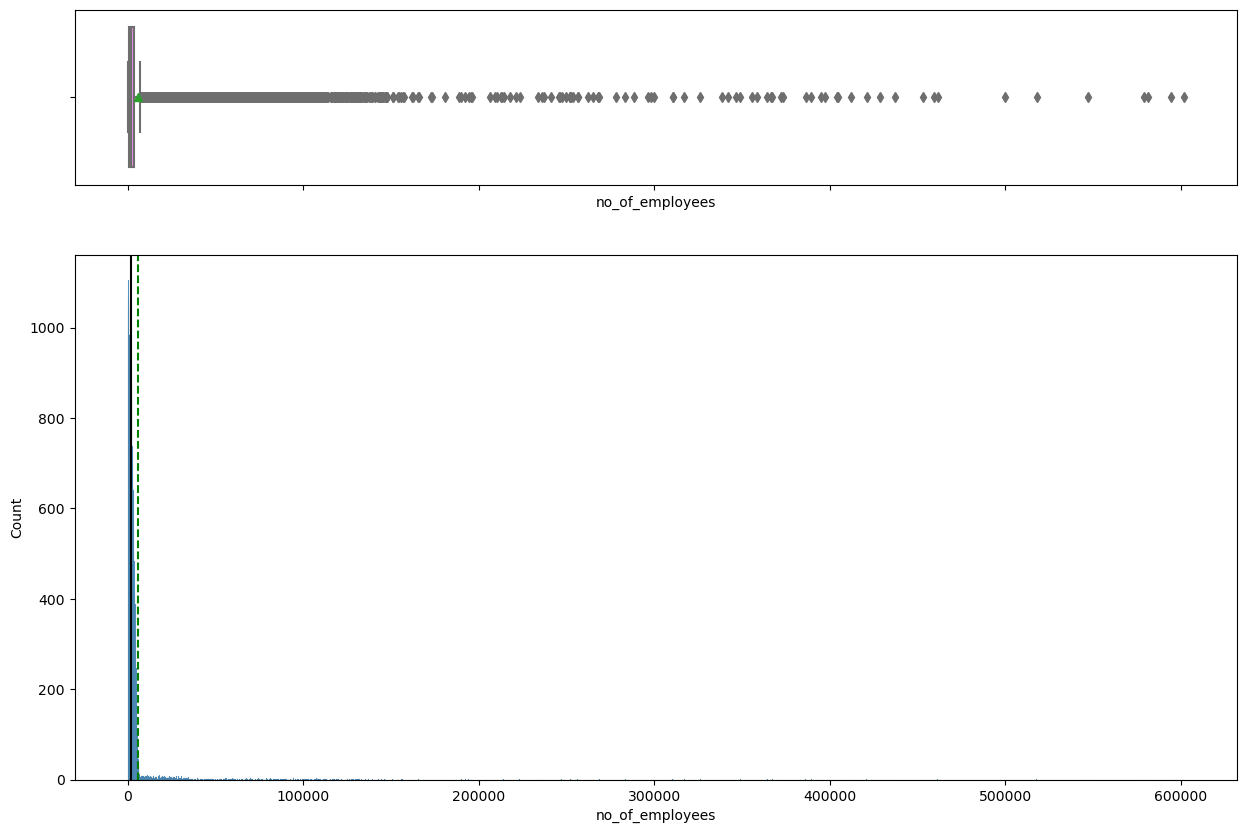

<IPython.core.display.Javascript object>

In [17]:
## let's have some obseravtion on no_of_employees
histogram_boxplot(data, "no_of_employees")

#### Observations
- we observe that there are variation in terms of number of employees based on the different features in the data set such education, continent, etcc
- the data is righ skewed and has many outlier on the higher side.

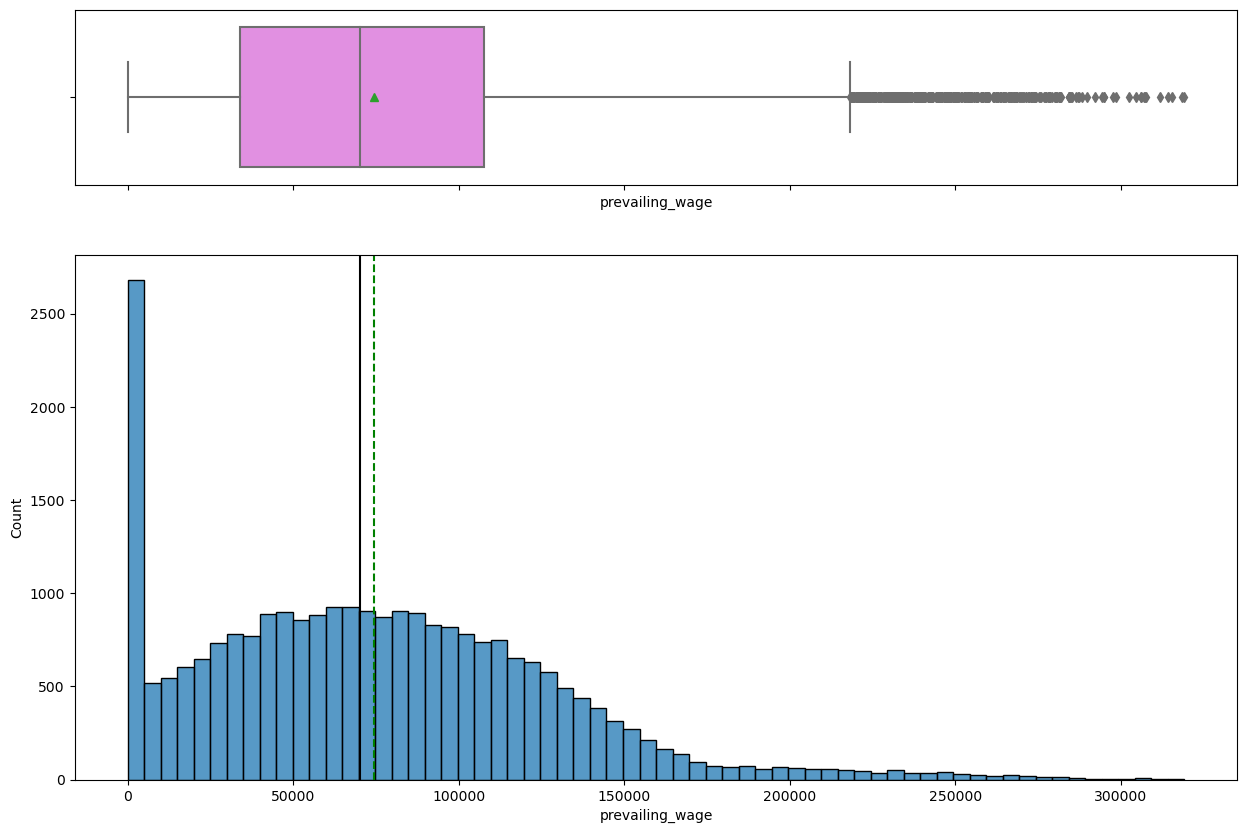

<IPython.core.display.Javascript object>

In [18]:
## let's have observations on prevailing wage using histogram_boxplot func().
histogram_boxplot(data, "prevailing_wage")

#### Observations
- as we see that mean is slightly higher than median, therefore, the data is right skewed.
- there are many outliers on the higher side of the boxplot.
- we observed many data on and around Zero, so, let's find out how many wage within range between 0 and 100

In [19]:
## as said, let's check how may wage are less than 100
data.loc[data["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


<IPython.core.display.Javascript object>

In [20]:
## now let's get the count of each wage unit of the wages which < 100
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
data.loc[data["prevailing_wage"] > 0, "unit_of_wage"].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

#### Observations
- count of wages  in this dataset have wage unit on yearly basis @22,962 which represent most of the wages in this dataset, monthly basis is only 89 which represent the lowest.
- Hourly basis unit also very low weight compare to yearly i.e. 2,157 only. 
- hourly unit of wages < 100 count is only 176 .

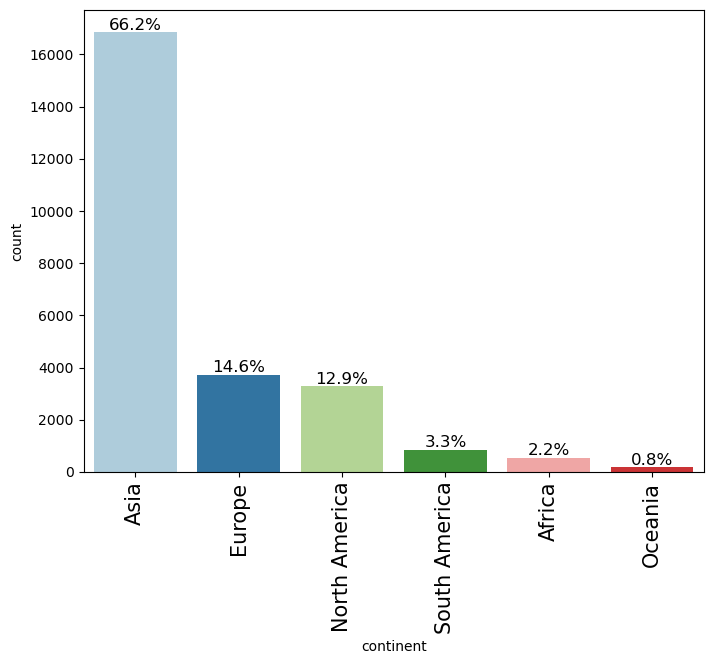

<IPython.core.display.Javascript object>

In [22]:
## let's now have some insights about employees' continent using labeled_barplot
labeled_barplot(data, "continent", perc=True)

#### Observations
- as we observed earlier that Asia is the most frequent continent of employees in this dataset @ 66.2% and Oceania is the lowest @ 0.8%


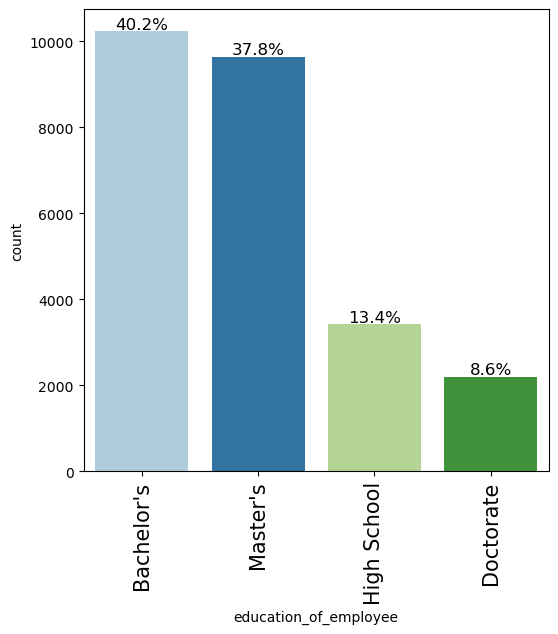

<IPython.core.display.Javascript object>

In [23]:
## let's have obseravtions on the education of employees using labeled_barplot func()
labeled_barplot(data, "education_of_employee", perc=True)

#### Observations
- As observed earlier that bachelor's degree is the most frequent educational level in this dataset @ 40.2%. however, Doctorate is the lowest @ 8.6%
 - it is very interesting to observe that Master's degrees also have a good percentage close to bachelor's @ 37.8%

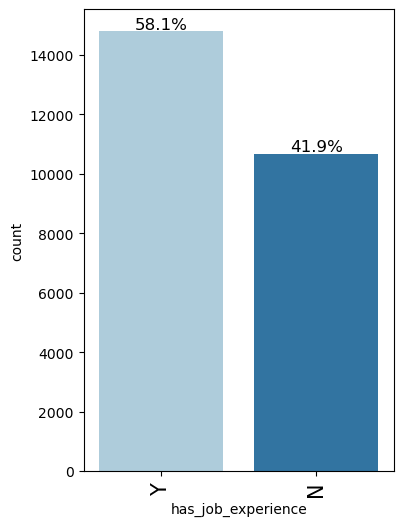

<IPython.core.display.Javascript object>

In [24]:
## let's have observations on has job experience
labeled_barplot(data, "has_job_experience", perc=True)

#### Observations
- we observe that employees have experience in this dataset are more than have not @ 58.1%

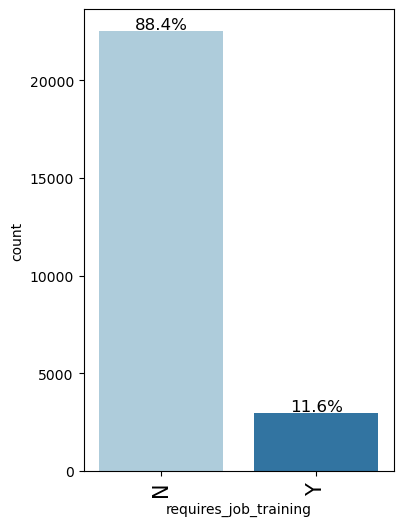

<IPython.core.display.Javascript object>

In [25]:
## let's chcek employees who required training
labeled_barplot(data, "requires_job_training", perc=True)

#### Observations
-  Employees are required to have traning in this dataset are less than who do not, i.e only 11.6 % however, employees do not require training are 88.4%.
- this is indicate that most of the employees are skilled.

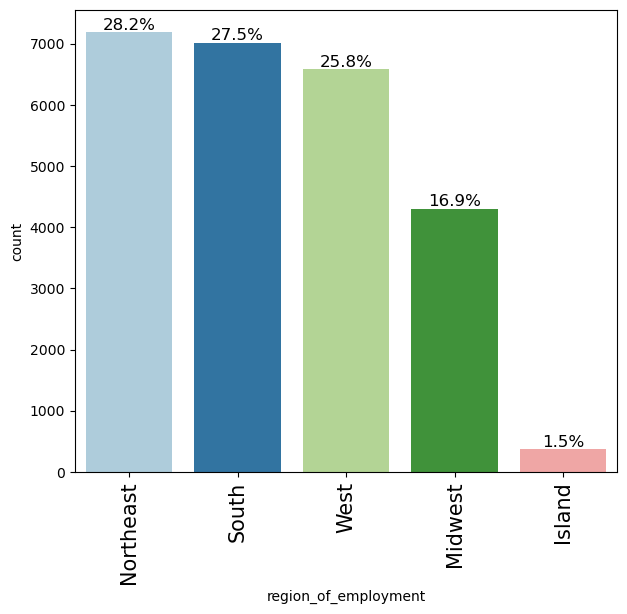

<IPython.core.display.Javascript object>

In [26]:
## let's have observation on the region of employment
labeled_barplot(data, "region_of_employment", perc=True)

#### Observations
- we observe that Northeast is the most frequent region of employment while Island is the lowest i.e., 28.2%,1.5%.
- we observe also that South region is very close to Northeast i.e. 27.5% while Northeast is 28.2%

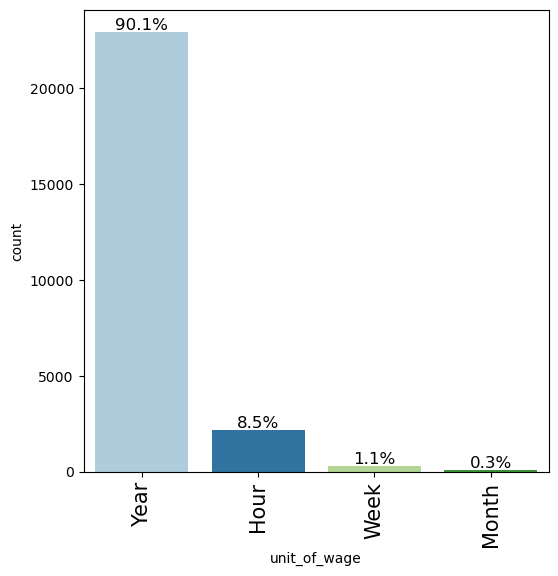

<IPython.core.display.Javascript object>

In [27]:
## let's observe unit of wage
labeled_barplot(data, "unit_of_wage", perc=True)

#### Observation
 - we observe that 90% of the units are yearly basis, however, 0.3% are monthly.
 - we observe that 8.5% of the units in this dataset are hourly basis
 

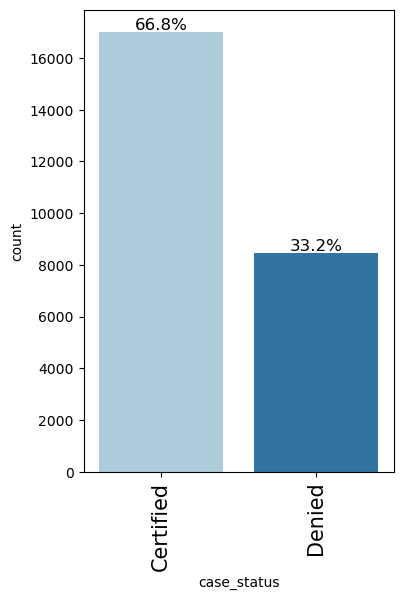

<IPython.core.display.Javascript object>

In [28]:
## let's have some obsevations on the case status
labeled_barplot(data, "case_status", perc=True)

#### Observations
- we observe that certified visa are more than denied @ 66.8 for cert. and 33.2% for den.

### Bivariate Analysis

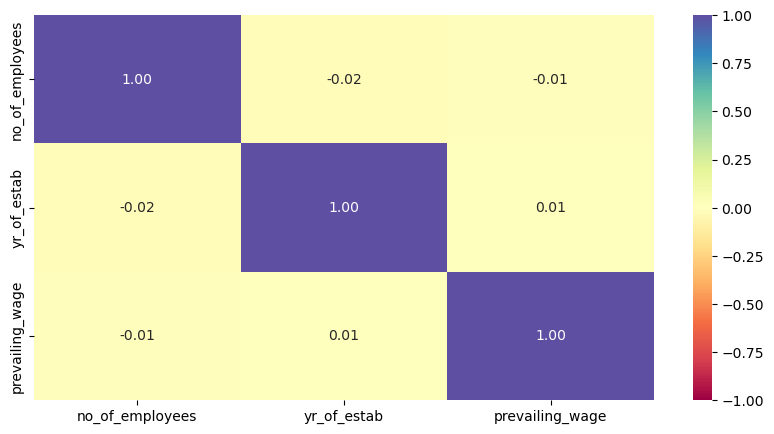

<IPython.core.display.Javascript object>

In [29]:
## let's find the correlation between numerical variables.
# for such will list-down numerical varibales in dataset and plot them using heat map
num_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[num_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
-  we observe weak correlation between numerical variable in the dataset

In [30]:
## let's create below function which will help us to plot distribution wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [31]:
## let's also define below function which Prints the category counts and plot a stacked bar chart
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

#### answer Q1 - Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


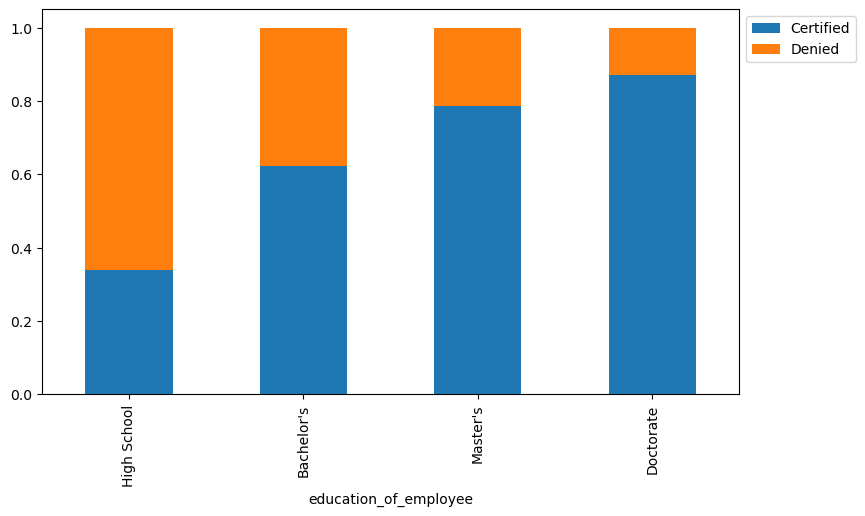

<IPython.core.display.Javascript object>

In [32]:
## will use stacked_barplot to plot c-status vs education to find out the relation
stacked_barplot(data, "education_of_employee", "case_status")

#### Observations
- We observe that employees who have doctorate degrees are most likely certified ~ 87% and employees who have high school are dislikely certified ~34% only.
- We observe also that employees who have Master's degree are more likely to certified compare to who having bachelor's degree i.e.~ 78% , 62% respectively.
- So, we assume that eduaction level have a positive impact on case status/ visa certification.

#### Following above insight, let's check what differences of educational requirements across the regions

In [33]:
pd.crosstab(data.region_of_employment, data.education_of_employee)

education_of_employee,Bachelor's,Doctorate,High School,Master's
region_of_employment,,,,
Island,129,25,60,161
Midwest,1315,256,736,2000
Northeast,2874,656,905,2760
South,2991,541,934,2551
West,2925,714,785,2162


<IPython.core.display.Javascript object>

#### Observations
- we observe that region West has the higest no. of talents with Doctorate
- we observe that region South has the highest no. of talents with bachelor's & high school degree
- we observe that region Northeast has the highest no. of talents with Master's degree.

#### Answer Q2. How does the visa status vary across different continents? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


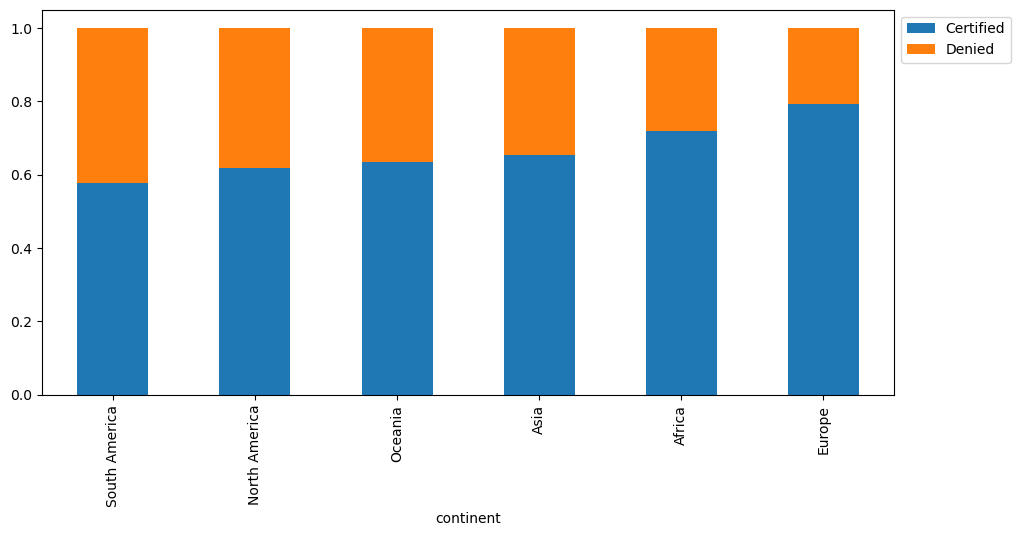

<IPython.core.display.Javascript object>

In [34]:
## will use stacked barplot function to visulize the relatioship

stacked_barplot(data, "continent", "case_status")

#### Observation
- We observe that in all continents, the certified visa is always more than denied one 
- We observe that in Europe, the percentage of certified visa is pretty more than denied.
- We observe also that in South Americal the denied percentage visa is the biggest compared certified one. to 

#### Answer to Q3 Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


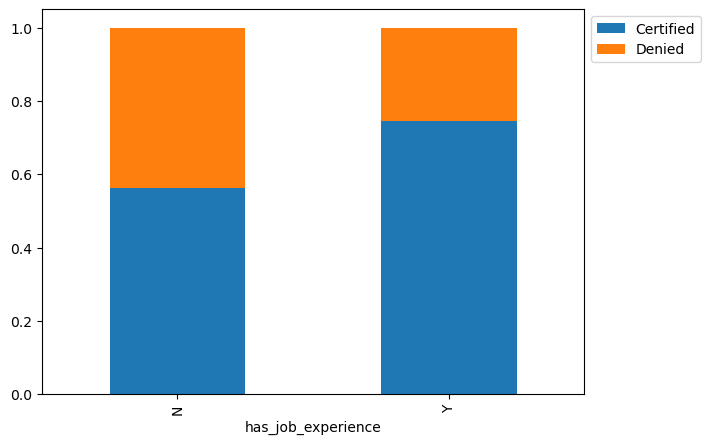

<IPython.core.display.Javascript object>

In [35]:
## let's find out the relationship by using defined function stacked_barplot
stacked_barplot(data, "has_job_experience", "case_status")

#### Observation
- We observe that possibility of professionals and experienced people to get certified visa is 74% which is a good percentage.
- it is interesting also to know that percentage of non-experienced employees to get certified visa is ~ 52% which more than 50%, so not bad percentage for non-experienced staff.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


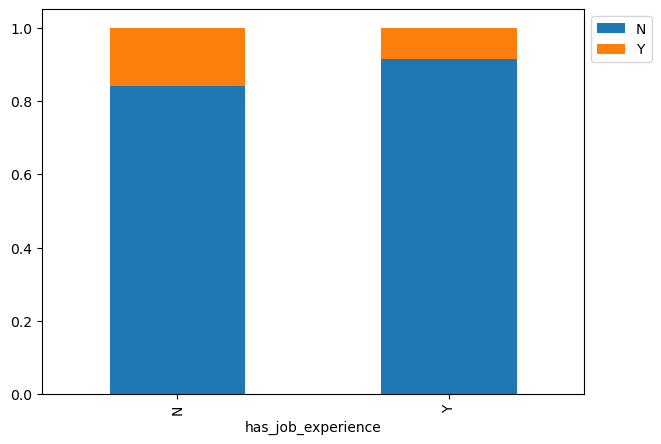

<IPython.core.display.Javascript object>

In [36]:
## let's check the relationship between experienced employees and training requirments
stacked_barplot(data, "has_job_experience", "requires_job_training")

#### Observations
- We observe that employees who have prior experience have less percentage of training requirement compared to non-experienced one.

#### Answer to Q4 In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


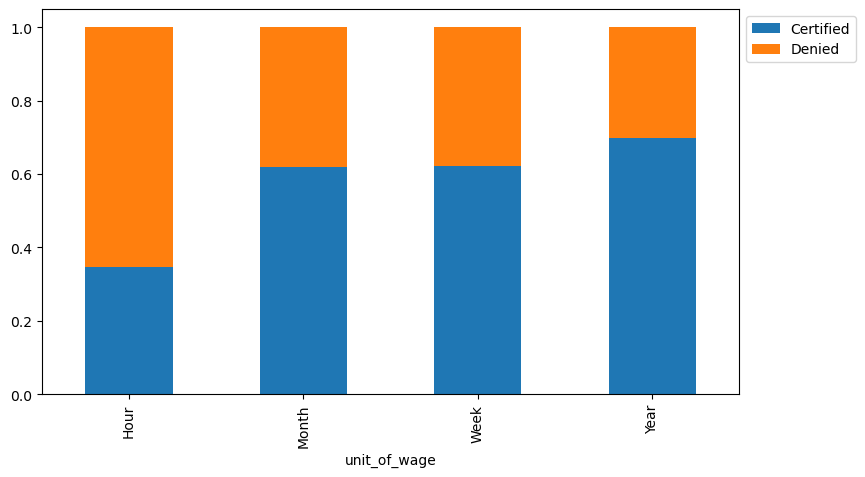

<IPython.core.display.Javascript object>

In [37]:
## let's find the relationship by using staked_barplot function
stacked_barplot(data, "unit_of_wage", "case_status")

#### Obseervations
- we observe that yearly basis paid is most likely to get certified visa ~ 69%
- we observe also that monthly and weekly basis paid having same perc for cert. visa ~ 62%
- hourly basis paid having the lowest percentage for cert. visa ~ 34.6

#### Answer to Q5 The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [38]:
## let's find out the relationship by using pre-defined function distribution_plot_wrt_target

<IPython.core.display.Javascript object>

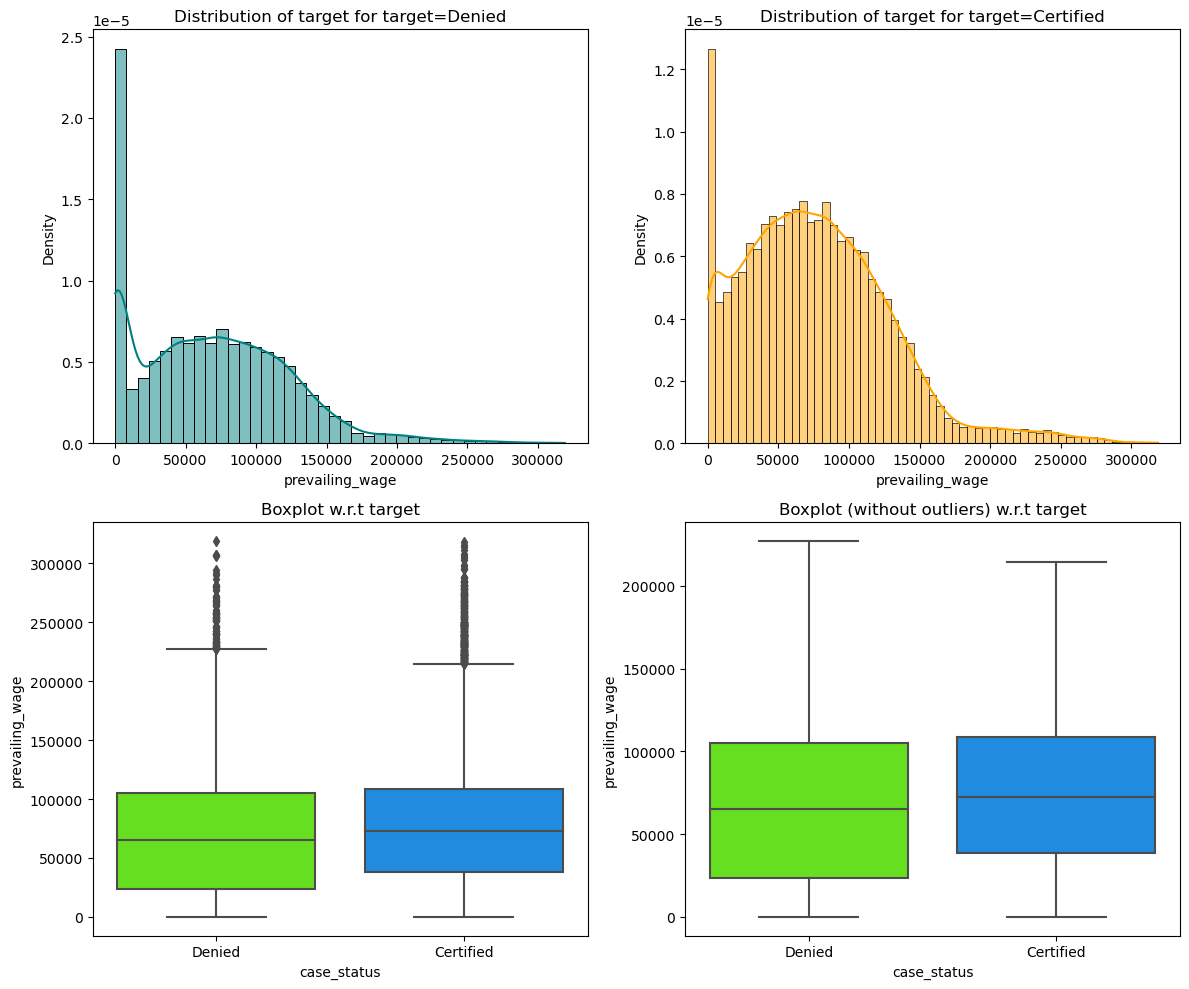

<IPython.core.display.Javascript object>

In [39]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### Observations
- we observe that average/median pervailing wage is slightly high for certified visa comapred to denied one.
- so prevailing wage has a positive impact to visa status.

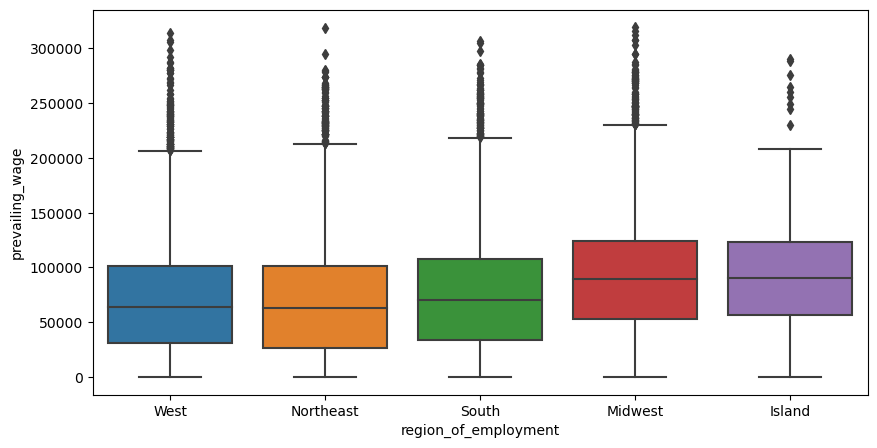

<IPython.core.display.Javascript object>

In [40]:
## follwing the above insight, let's check diff pervailing wages across usa
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="region_of_employment", y="prevailing_wage")
plt.show()

#### Observations
- We observe that Island and Midwest having the highest average prevailing wage across regions. and Midwest have the highest variations in wages.
- We observe that West and Northeast having the lowest average wage.
- We record many outliers for all regions as well.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

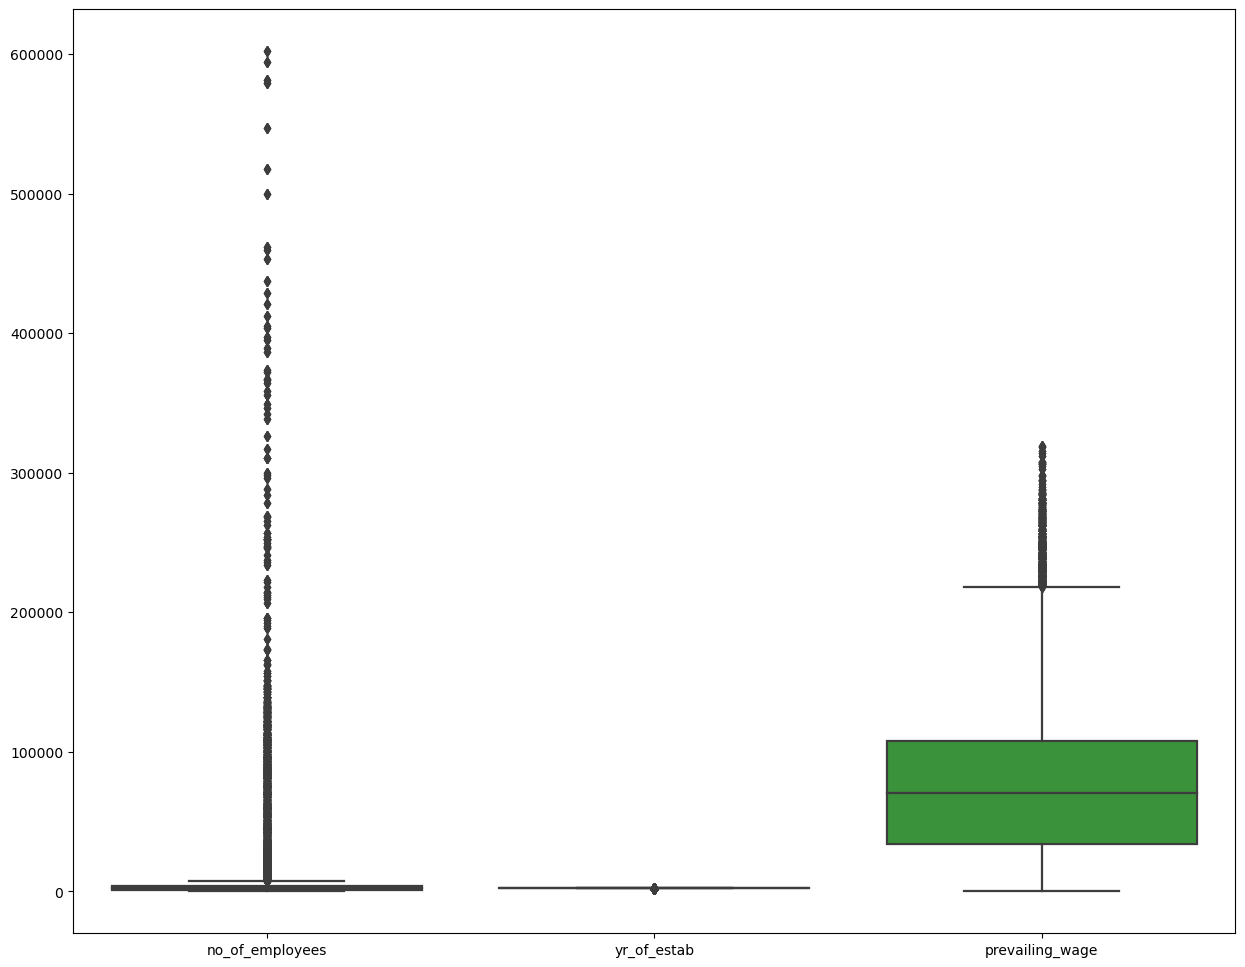

<IPython.core.display.Javascript object>

In [41]:
## let's check Outlier for treatment if required by boxplot

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    sns.boxplot(data[numeric_columns])

plt.show()

#### Observations
- We observe many outliers in number of employees, years of estab and prevailing wage
- We will not treat this outliers since it is classification problem.

#### Preparation data for modeling 


In [42]:
# let's encode our target which will assign 1 to predicted visa as denied
# and will assign 0 for certified

data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)



<IPython.core.display.Javascript object>

In [43]:
data.case_status.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
## now, let's create X,Y, get_dummies and splitting the data for training

X = data.drop("case_status", axis=1)
Y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)


<IPython.core.display.Javascript object>

In [45]:
# now, let's splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

In [47]:
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

In [48]:
Y.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

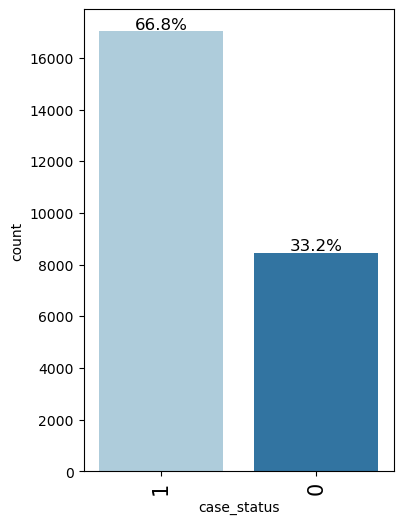

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(data, "case_status", perc=True)

In [50]:
## let's print the shape size of Y,X and percentages

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

#### let's list down model erros over here:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

#### let's decide error we should optimize/ important ? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 

* so, in this case will focus on F1 score to be used as metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights as hyperparameter so that model focuses equally on both classes.

### Creating customized function for model evaluation processes
- model_performance_classification_sklearn function will be used to check the model performance of models.
- The confusion_matrix_sklearn function will be used to plot the confusion matrix.


In [51]:
# defining a function tmodel_performance_classification_sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [52]:
# defining confusion_matrix_sklearn


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building bagging and boosting models

### Decision Tree Model Building

In [53]:
## first let's built Decision tree model and fit it on trarining set
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

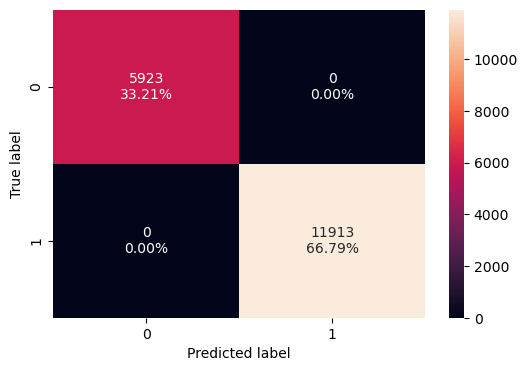

<IPython.core.display.Javascript object>

In [54]:
## let's check model perforamnce using defined functions
confusion_matrix_sklearn(model, X_train, y_train)

#### Observations
- intially the model predicted zero error in the training set which lead to overfitting

In [55]:
## let's check perforance metrics scores
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

#### Observations
- as we noticed from the CM that the model tend to overfitting on the training set
- so, let's confirm that by check the model performance in test sets.

In [56]:
## let's check the performance metrics on the test data as well
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

#### Opservations 
- As we expected that accurancy dropped to 66%, recall, precis and F1 dropped to 74%,75% and 75%.so that, it is confirmed that model is overfitted.

### Let's build the model with Hyperparameters tuning
1. "Class_weights":  since the frequency of class 1 is 66.8 and class 0 is 33.2. so, class 1 will become the dominant classes. so that, we will balance both classes using balanced class weights
2. Grid Search: this is a tuning technique to compute the optimum value of hyperparameter, will compute below hyperparameter
   - Calss_Weight:
   - max_depth
   - max_leaf_nodes
   - min_Samples_leaf

In [57]:
## build new model with balanced class weights and other tuning hyperparameters

# Assign the classifier
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# setting grid-parameters:
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# choose scorer F1 as discussed earlier in model evaluation criterion
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(
    estimator=dtree_estimator, param_grid=parameters, scoring=scorer, n_jobs=-1, cv=5
)

grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

<IPython.core.display.Javascript object>

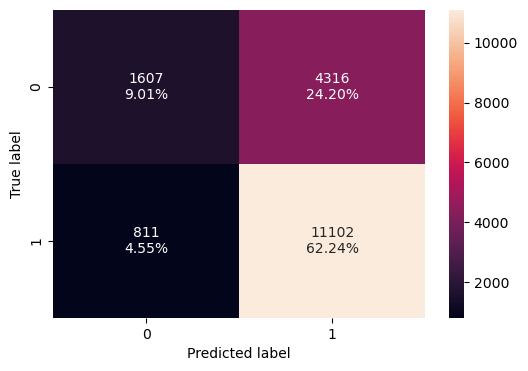

<IPython.core.display.Javascript object>

In [58]:
## let's check performance of Dtree model with hyper. para tuning on training set
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

#### Observations
- We observe from CM above that model predict errors 24% and 4.55 false positve & false negative
- so, let's us check metrics scoring as well.

In [59]:
# dtee_estimator performance check on training test
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


<IPython.core.display.Javascript object>

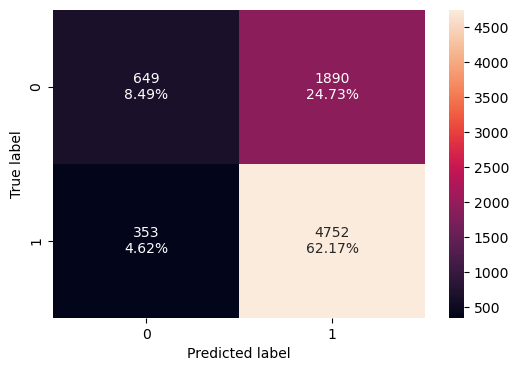

<IPython.core.display.Javascript object>

In [60]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [61]:
## let's check for test data for comparison
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    model, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


<IPython.core.display.Javascript object>

#### Observations
- we observe that accuracy droped to 66% which again the model is overfitted.
- also,F1 score reduced to 74.7 and the same also for recall and percision reduced.
- So, in this case let's use another classifier i.e. Bagging

#### Plotting the feature importance of each variable

In [62]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False)
)

                                   Importance
prevailing_wage                      0.266463
no_of_employees                      0.254364
yr_of_estab                          0.173528
education_of_employee_High School    0.078179
has_job_experience_Y                 0.045926
education_of_employee_Master's       0.021227
continent_Europe                     0.017240
full_time_position_Y                 0.017114
region_of_employment_South           0.016760
requires_job_training_Y              0.015461
region_of_employment_Midwest         0.014366
education_of_employee_Doctorate      0.014358
continent_Asia                       0.013671
region_of_employment_West            0.013408
region_of_employment_Northeast       0.012864
continent_North America              0.009556
continent_South America              0.006247
unit_of_wage_Year                    0.003699
unit_of_wage_Week                    0.002587
continent_Oceania                    0.002130
unit_of_wage_Month                

<IPython.core.display.Javascript object>

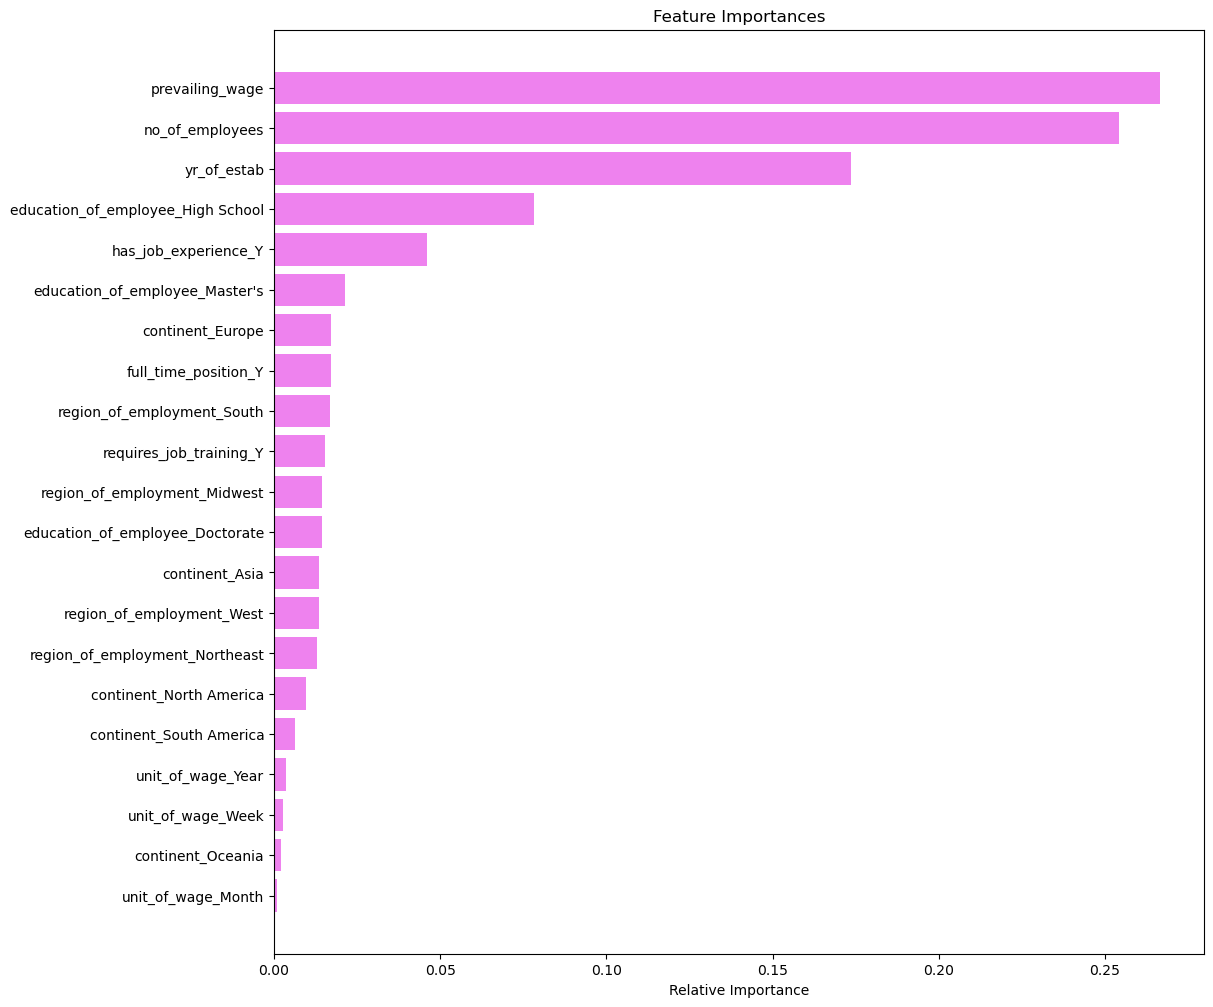

<IPython.core.display.Javascript object>

In [63]:
feature_names = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations on important feature
- we observe that prevailing wage is the most important feature according to this model.
- unit of wage is the lowest,

### Let's build Bagging model and use hyperparameters tuning also



In [64]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

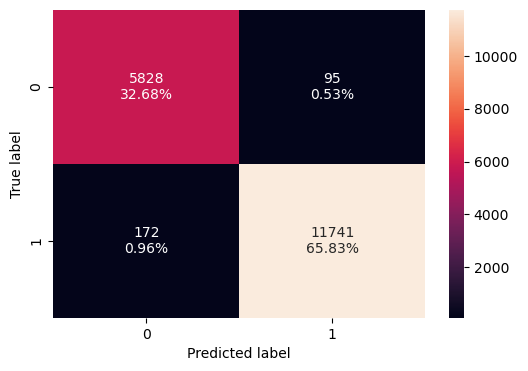

<IPython.core.display.Javascript object>

In [65]:
## now let's check performance of Bagging model on training
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

#### Observations
- we observe that model predicted less errors in training stage ~ 0.53, 0.96 false pos/neg
- let's check the metrics score as well below

In [66]:
## model performance metrics score on training set
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.98503,0.985562,0.991974,0.988757


<IPython.core.display.Javascript object>

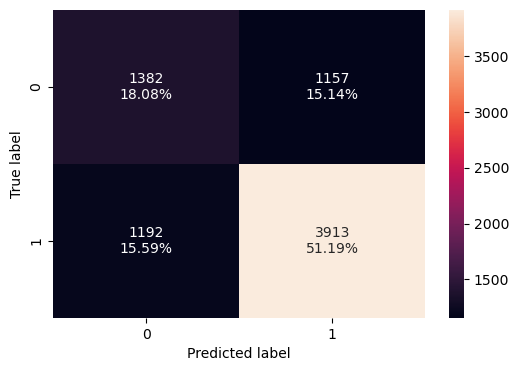

<IPython.core.display.Javascript object>

In [67]:
## checking model performance CM on test set
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

## Obseravations

- We Observe that prediced errors has been increased
- let's see the metrics scoring aswell

In [68]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.6927,0.766503,0.771795,0.76914


<IPython.core.display.Javascript object>

#### Observations
-  We observe that Accuracy reduced to 62.9% and F1 reduced to 76.9% comapred to training results.
- so, this model is also over fitted.

#### Build the model - Bagging Classifier with hyperparameter tuning
- Will use hyperparameter such as:
    - Max_samples
    - Max_feature
    - N_estimators

In [69]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# will assign the parameters
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# assign f1 score to scorer
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

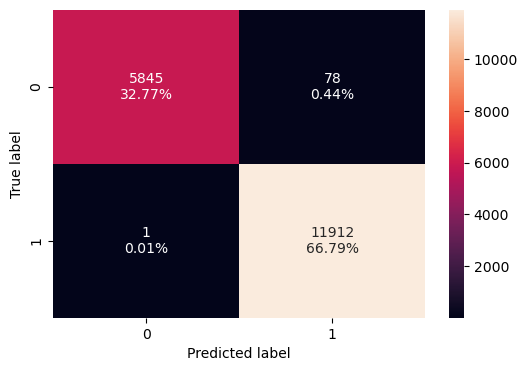

<IPython.core.display.Javascript object>

In [70]:
# now, let's check the model performance CM on training set
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

#### Observations
- We observe that Machine has predicted a little errors on training data
- let's check Machine perforamnce on test data as well.

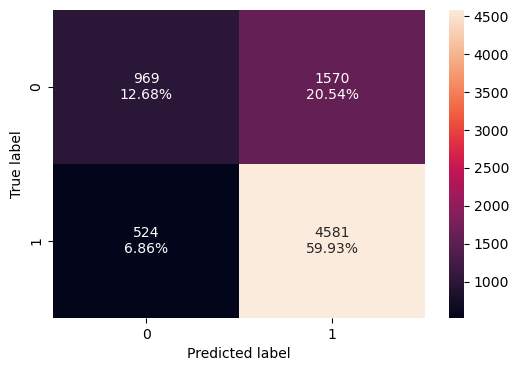

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

#### Observations
- We observe that on test data the model predicted more errors which mean that model tend to be over fitted.

In [72]:
## let's check the model performance metrics score on training and test stages
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995571,0.999916,0.993495,0.996695


<IPython.core.display.Javascript object>

In [73]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.72606,0.897356,0.744757,0.813966


<IPython.core.display.Javascript object>

#### Observations
- Outcomes looks slightly better than previous model which both accuracy and f1 got some increase but overall the model tend to be overfitted aswell. 

#### Let's build model using random forest Classifier

In [74]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)



RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

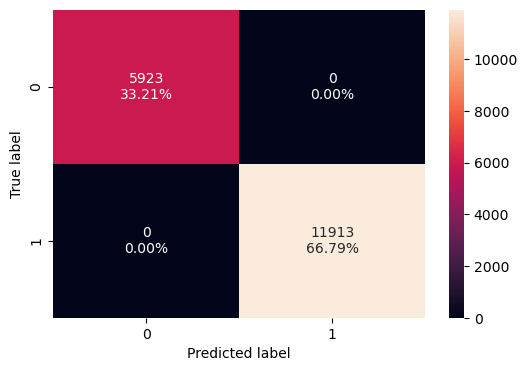

<IPython.core.display.Javascript object>

In [75]:
## check the model performance CM on the training data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

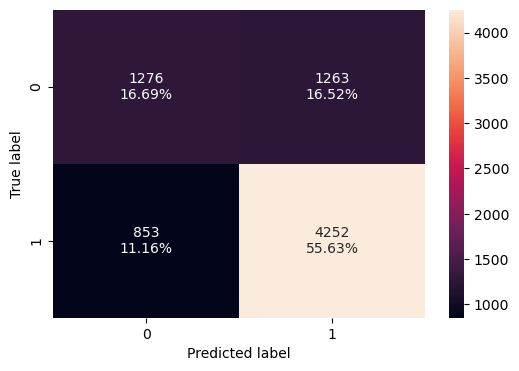

<IPython.core.display.Javascript object>

In [76]:
## Check the model performance CM on the test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

#### Observations
- We observe that RF model did not predict errors on training data but got some errors in test data, i.e. 16.52% & 11.16% false positive & false negative.
- let's check also performance metrics score as well.

In [77]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [78]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.723182,0.832909,0.770988,0.800753


<IPython.core.display.Javascript object>

#### Observations
- We observe that outcomes did not enhanced from previous model and tend to overfitting.


### let's build the model using random forest with hyperparameters tunning
- will use hyperparameter such as:
    - oob_score is true to use the samples that was not used in training 
    - boot_strap is true, so each tree will be trained on subset instead of all observation
    - max_depth, max_features, min_samp_split, n_estimators

In [79]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensem

/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/mustafaassem/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

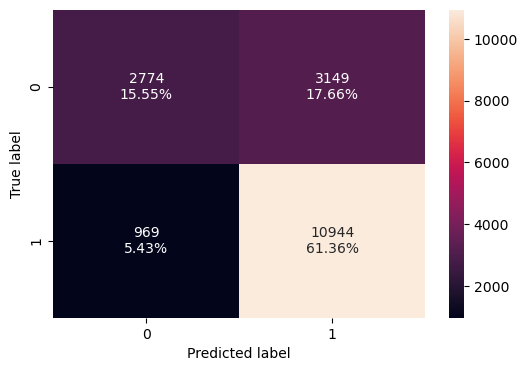

<IPython.core.display.Javascript object>

In [80]:
## now, let's check the model performance by viewing CM on training and test data
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

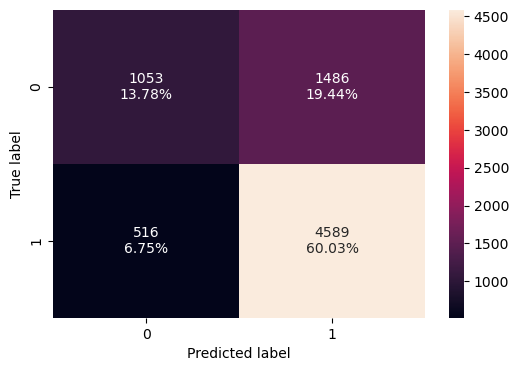

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

#### Observation
- we observe form CM in both training and test data that errors in testing and training are a little bit close
- will check performance metrics score for both to have a better picture.

In [82]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


<IPython.core.display.Javascript object>

In [83]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


<IPython.core.display.Javascript object>

#### Observations
- we observe that outcomes of accuracy and f1 in test data are slightly enhanced but the model still does not give the maximum good results
- so that, will use another model Classifier and search for the best one.

In [84]:
print(
    pd.DataFrame(
        rf_tuned.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False)
)

                                   Importance
education_of_employee_High School    0.234452
prevailing_wage                      0.150029
has_job_experience_Y                 0.118696
education_of_employee_Master's       0.085766
no_of_employees                      0.067280
yr_of_estab                          0.058228
education_of_employee_Doctorate      0.055792
unit_of_wage_Year                    0.046702
continent_Europe                     0.041715
region_of_employment_Midwest         0.024973
continent_Asia                       0.016195
region_of_employment_West            0.015561
full_time_position_Y                 0.014733
region_of_employment_South           0.014553
continent_North America              0.013878
requires_job_training_Y              0.012244
region_of_employment_Northeast       0.010722
continent_South America              0.008815
unit_of_wage_Week                    0.004329
continent_Oceania                    0.003455
unit_of_wage_Month                

<IPython.core.display.Javascript object>

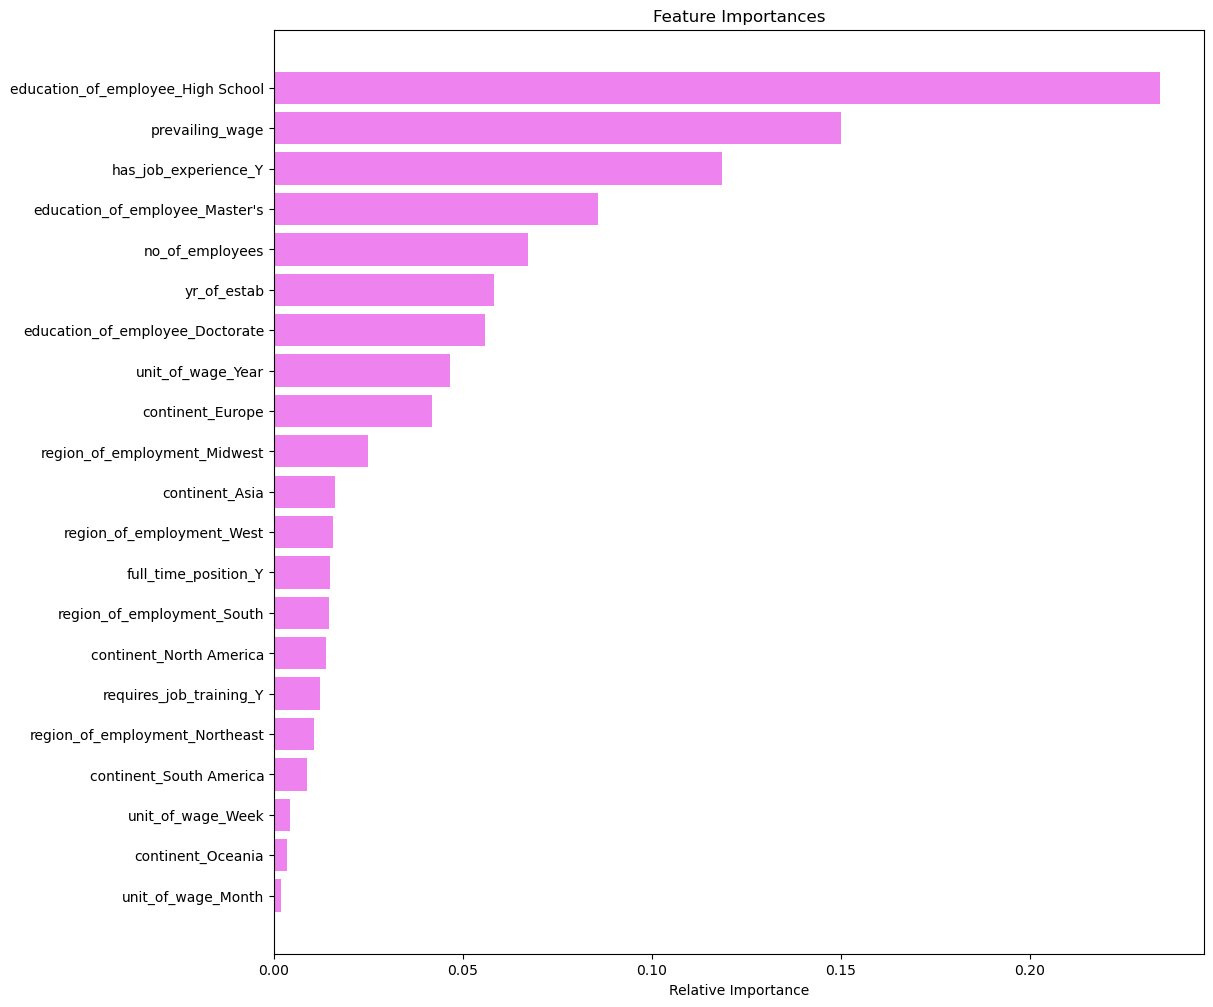

<IPython.core.display.Javascript object>

In [85]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
- we observe that in this model high school Education became the most important feature and still unit of wage is the lowest one

### Let's build Boosting model - Ada-boosting Classifier


In [86]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

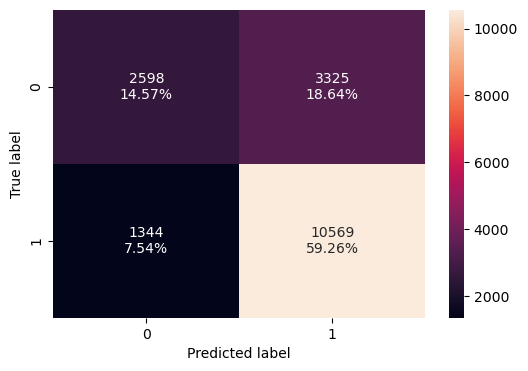

<IPython.core.display.Javascript object>

In [87]:
## Let's check model performance CM on training and test data
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

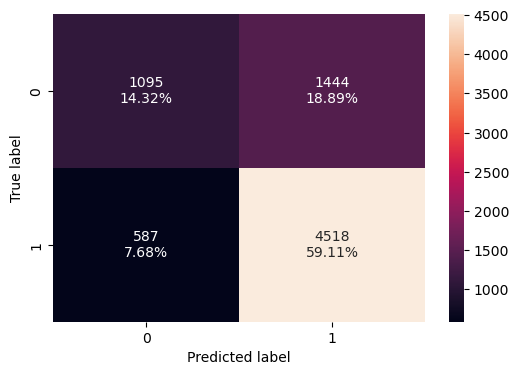

<IPython.core.display.Javascript object>

In [88]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

#### Observations
- We observe that model on testing data gave same or close to the same errors of training data, so this is mean that the model is not overfitted

In [89]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


<IPython.core.display.Javascript object>

In [90]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


<IPython.core.display.Javascript object>

#### Observations
- we observe that all metrics scorings in test data is close or similar to training results which mean that the model is not overfitted.
- but the accouracy still not in a good position and f1 score as well.
-  We may try hyperparameter tuning for Ada-boosting

### build Ada-boosting model with hyperparameter tuning as below
- will use different depth para.
- n_estimators para.
- learning rate par.


In [91]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}


acc_scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


abc_tuned = grid_obj.best_estimator_


abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

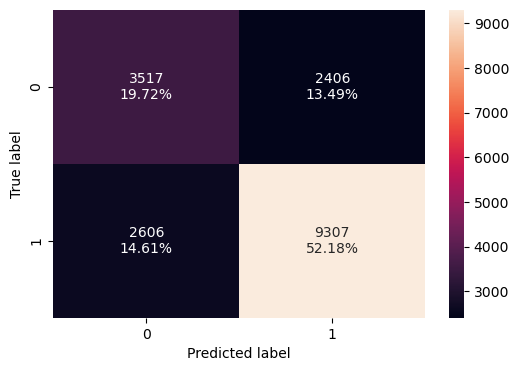

<IPython.core.display.Javascript object>

In [92]:
## lel's check the model performance CM on training and testing
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

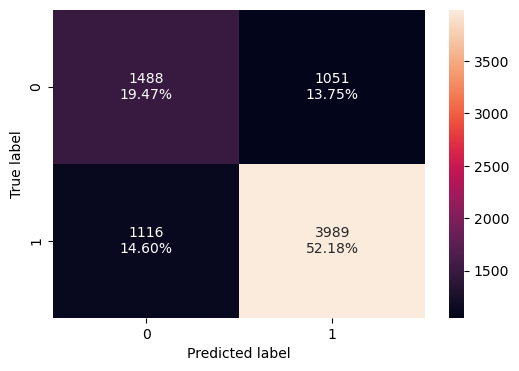

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

#### Observations
- we observe that the model have same performance of previous one which model predicted same errors but accuracy is still low
- will check metrics scoring as well for clear picture

In [94]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


<IPython.core.display.Javascript object>

In [95]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


<IPython.core.display.Javascript object>

#### Observations
- we observe that this model shows low score in Accuracy and f1 score.
- so, we may use another type of boosting looking for better performance

#### Plot importance features

In [96]:
print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False)
)

                                   Importance
has_job_experience_Y                     0.17
education_of_employee_Master's           0.15
education_of_employee_High School        0.14
education_of_employee_Doctorate          0.13
region_of_employment_Midwest             0.11
continent_Europe                         0.10
prevailing_wage                          0.08
region_of_employment_South               0.07
unit_of_wage_Year                        0.04
region_of_employment_West                0.01
unit_of_wage_Week                        0.00
unit_of_wage_Month                       0.00
region_of_employment_Northeast           0.00
no_of_employees                          0.00
requires_job_training_Y                  0.00
yr_of_estab                              0.00
continent_South America                  0.00
continent_Oceania                        0.00
continent_North America                  0.00
continent_Asia                           0.00
full_time_position_Y              

<IPython.core.display.Javascript object>

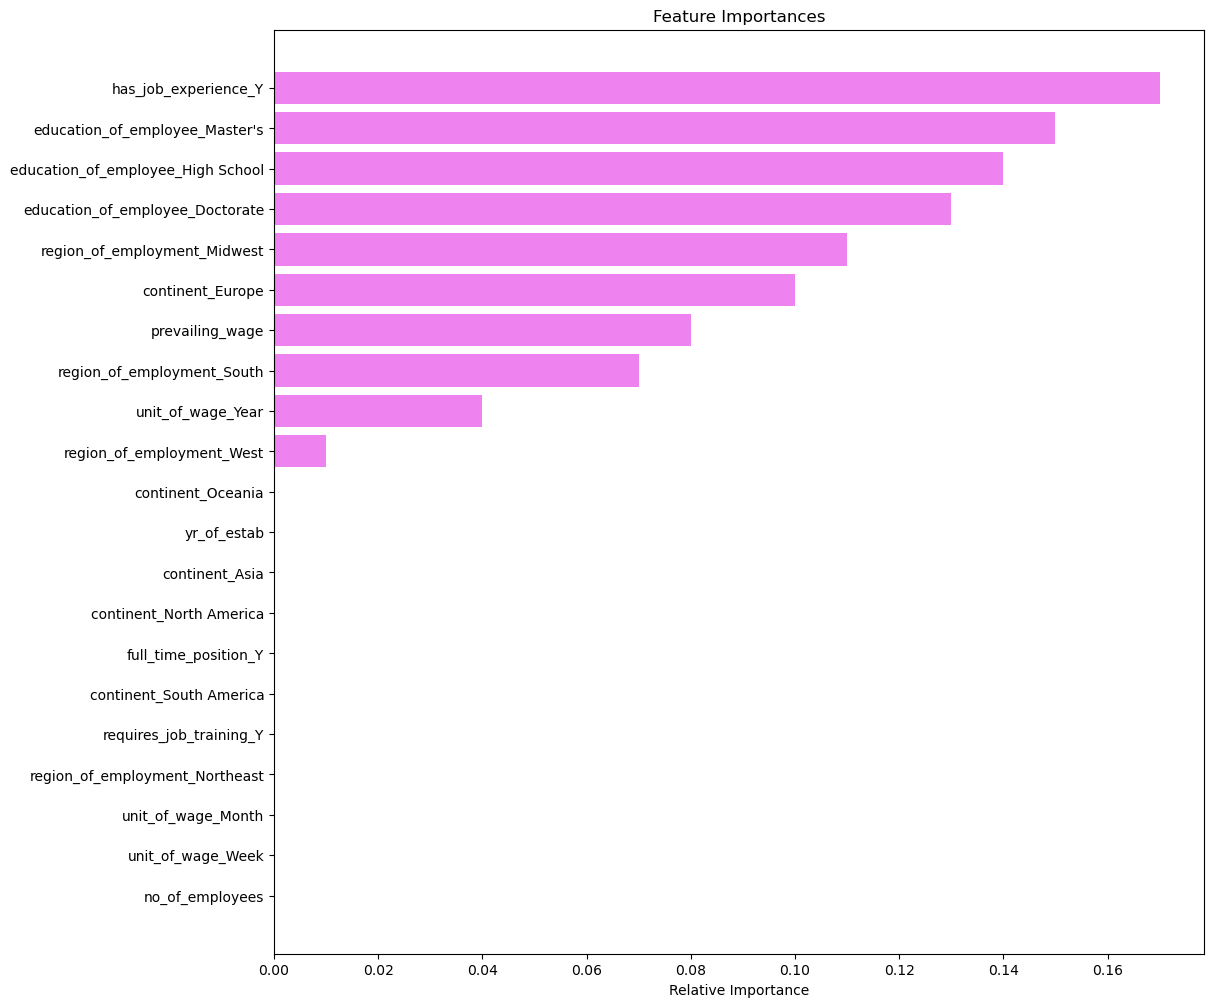

<IPython.core.display.Javascript object>

In [97]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
- we observe that no. of important features have been reduced
- we observe also that in this model experience is the most important feature.

### Let's build another model with gradient boosting Classifier

In [98]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

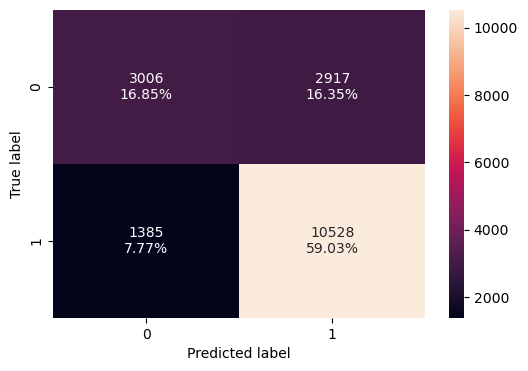

<IPython.core.display.Javascript object>

In [99]:
## let's check the performance of the model just created right now
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

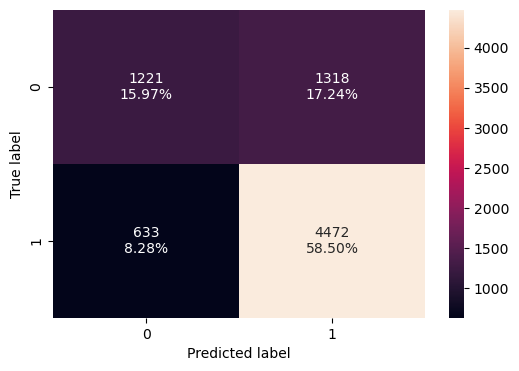

<IPython.core.display.Javascript object>

In [100]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

#### Observations
- the model is generalized not overfitted but looks like accuracy is still low
- let's have a look on scoring as well.

In [101]:
## let's check metrics scoring on trainign and testing data
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


<IPython.core.display.Javascript object>

In [102]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


<IPython.core.display.Javascript object>

#### Observations
- we observe that the accuracy and f1 score still low for this model
- so, let's use the hyperparameter tuning

### Build gradient boosting model with hyperparameter tuning such as:
- init parameter as Adaboost Classifier, random_state 1
- n_estimators para.
- subsample para.
- max_features para.
- learning_rate para.

In [103]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


gbc_tuned = grid_obj.best_estimator_


gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

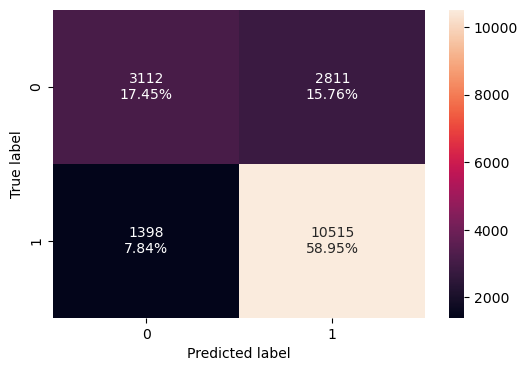

<IPython.core.display.Javascript object>

In [104]:
## let's check the performance of model on training and test data for Cm & Metrics scoring

confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

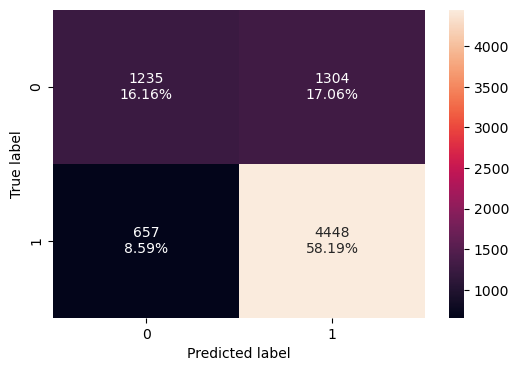

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [106]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


<IPython.core.display.Javascript object>

In [107]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


<IPython.core.display.Javascript object>

#### Observations
- We observe that the model is generalized and not overfitted but still accuracy and f1 score low or same as previous model
- So, we may use another boosting classifier for better results.

#### Plot importance feature

In [108]:
print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False)
)

                                   Importance
education_of_employee_High School    0.257251
has_job_experience_Y                 0.165009
prevailing_wage                      0.145543
education_of_employee_Master's       0.098960
education_of_employee_Doctorate      0.071671
continent_Europe                     0.057040
no_of_employees                      0.034993
region_of_employment_Midwest         0.031480
unit_of_wage_Year                    0.026961
region_of_employment_South           0.023359
yr_of_estab                          0.021064
continent_North America              0.013995
region_of_employment_West            0.010296
continent_Asia                       0.010076
full_time_position_Y                 0.009946
continent_South America              0.007628
requires_job_training_Y              0.006981
region_of_employment_Northeast       0.006006
continent_Oceania                    0.001001
unit_of_wage_Week                    0.000447
unit_of_wage_Month                

<IPython.core.display.Javascript object>

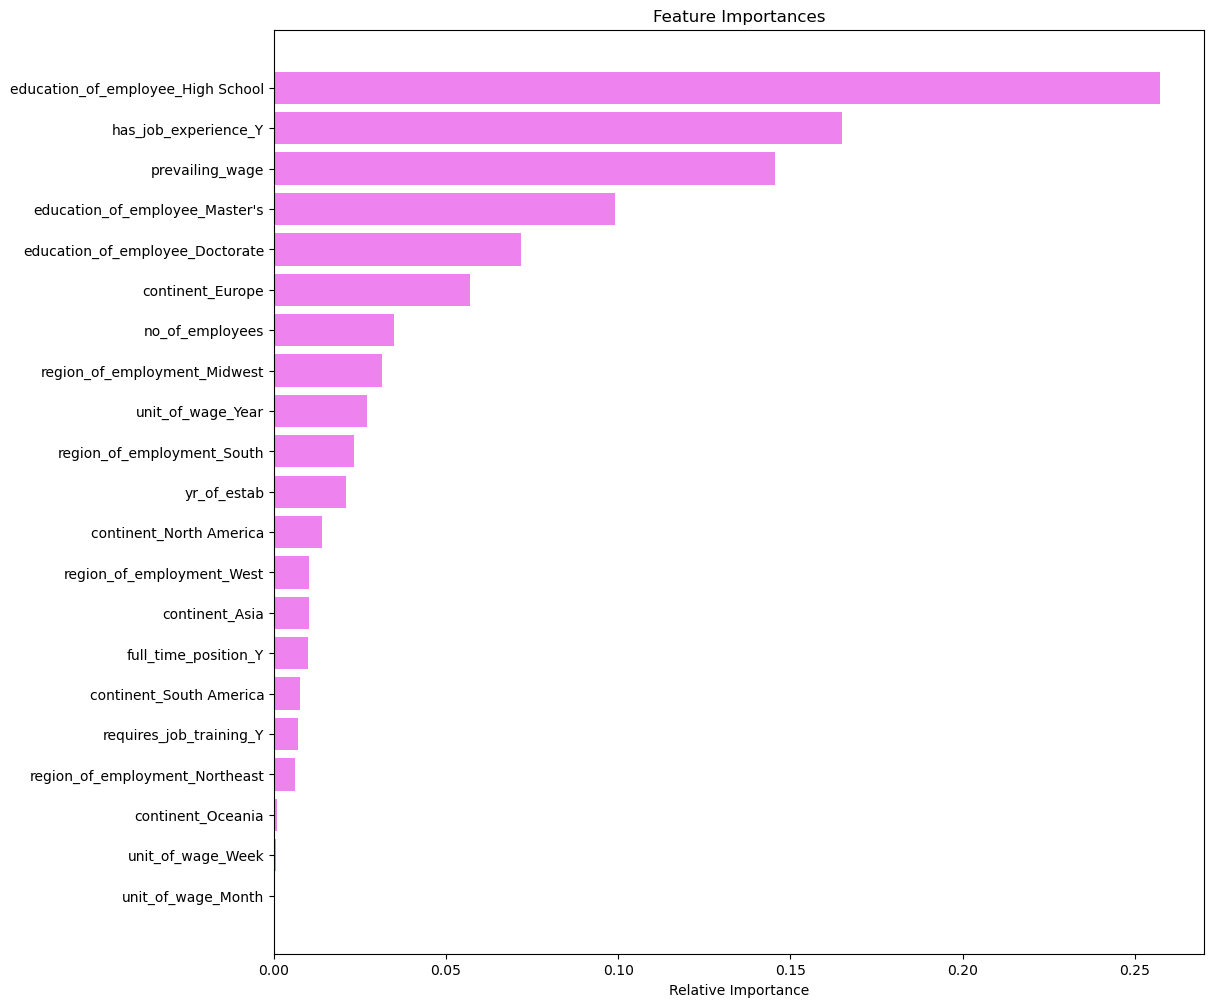

<IPython.core.display.Javascript object>

In [109]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observation
- we observe that  high school education still the most important feature as per this model followed by experience & pervailing wage.

### let's build another model using XGBoost Classifier

In [110]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

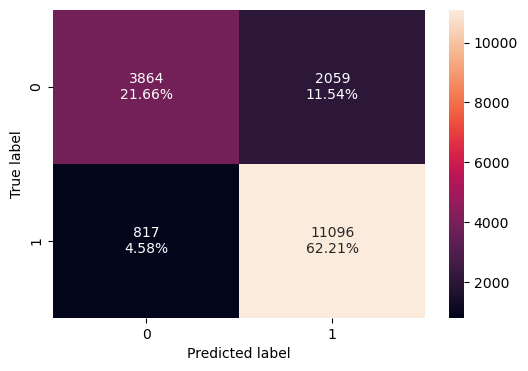

<IPython.core.display.Javascript object>

In [111]:
## let's check the performance on training and testing
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

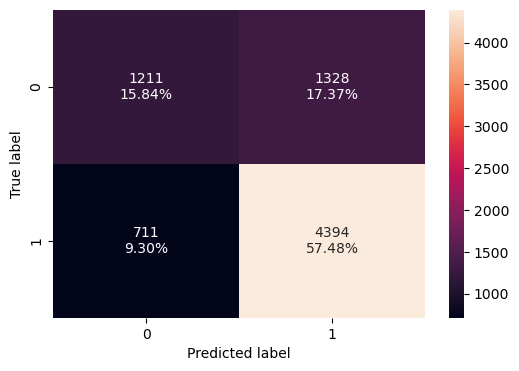

<IPython.core.display.Javascript object>

In [112]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [113]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


<IPython.core.display.Javascript object>

In [114]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


<IPython.core.display.Javascript object>

#### Observations
- we observe that model is generalized and not overfitted.
- let's use some hyperparameter to enhance the results 

### let's build model xgb with hyper parameter tuning such as: 
- eval_metric="logloss"
- scale_pos_weight
- colsample_bytree
- colsample_bylevel
- gamma
- learning_rate

In [115]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")


parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


xgb_tuned = grid_obj.best_estimator_


xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

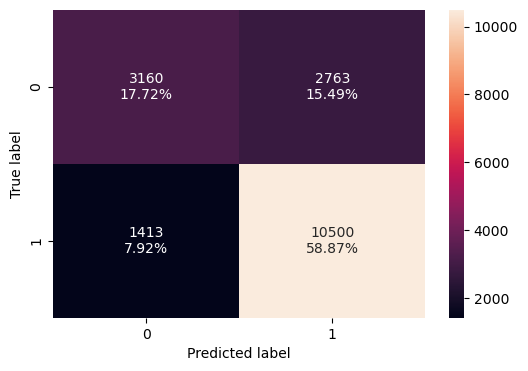

<IPython.core.display.Javascript object>

In [116]:
## let's check the performance of the model with hyperparameter
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

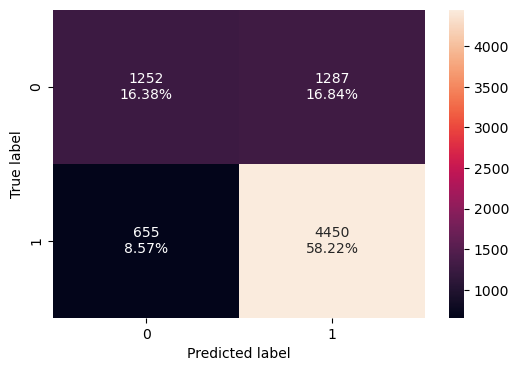

<IPython.core.display.Javascript object>

In [117]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [118]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765867,0.88139,0.791676,0.834128


<IPython.core.display.Javascript object>

In [119]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745945,0.871694,0.775667,0.820882


<IPython.core.display.Javascript object>

#### Observations
- we observe that the model much better in f1 score and accuracy compared to previous one
- we can try another model to check better results if any!

#### plot important feature

In [120]:
print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Importance"], index=X_train.columns
    ).sort_values(by="Importance", ascending=False)
)

                                   Importance
education_of_employee_High School    0.335181
has_job_experience_Y                 0.118287
education_of_employee_Master's       0.090887
education_of_employee_Doctorate      0.085883
continent_Europe                     0.057445
unit_of_wage_Year                    0.037596
region_of_employment_Midwest         0.036096
region_of_employment_South           0.032288
region_of_employment_Northeast       0.027242
region_of_employment_West            0.024239
prevailing_wage                      0.024158
continent_Asia                       0.023618
full_time_position_Y                 0.023428
requires_job_training_Y              0.015936
continent_South America              0.013244
continent_North America              0.012891
continent_Oceania                    0.010851
yr_of_estab                          0.010458
no_of_employees                      0.010359
unit_of_wage_Week                    0.009915
unit_of_wage_Month                

<IPython.core.display.Javascript object>

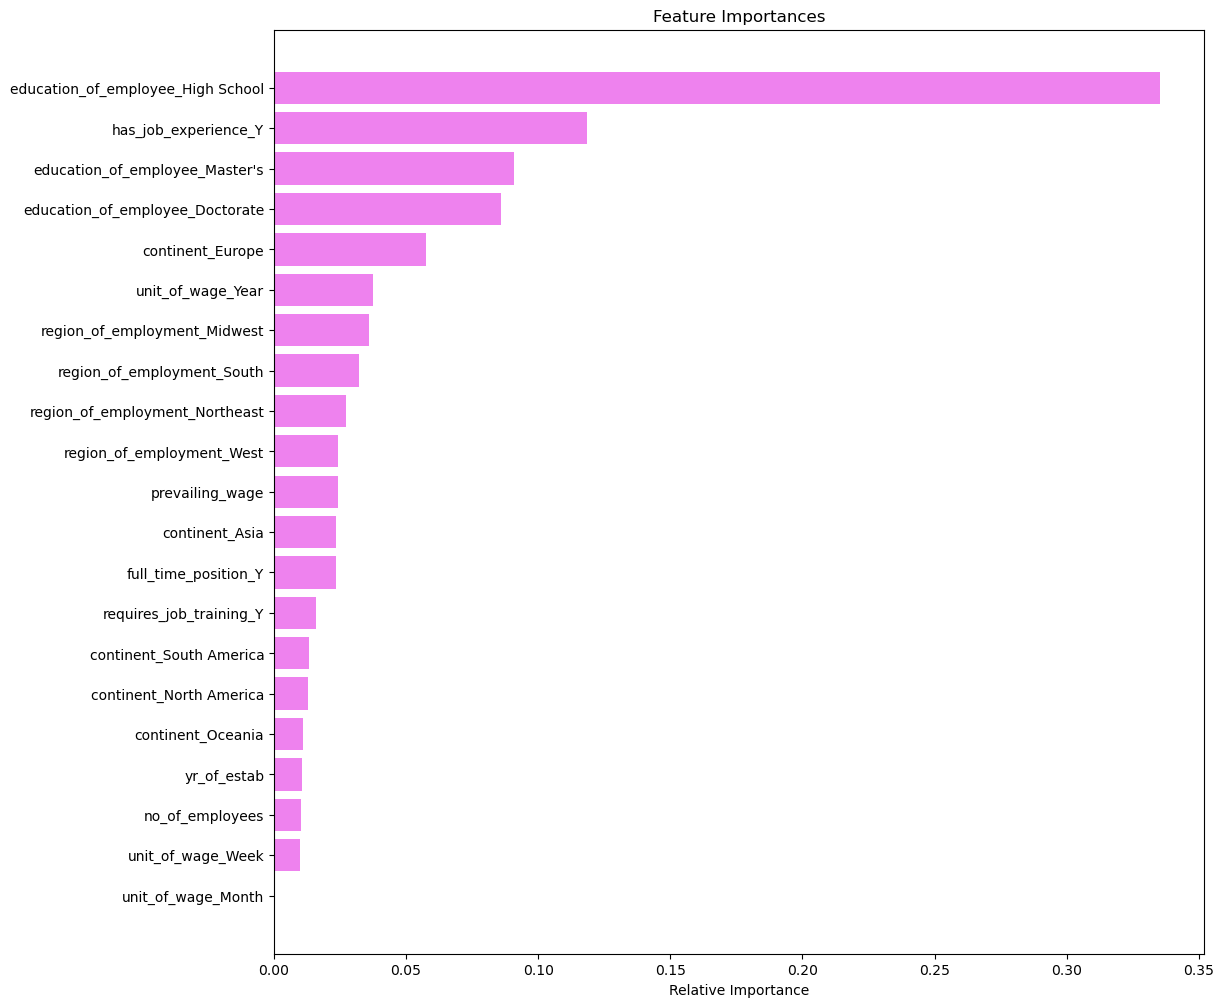

<IPython.core.display.Javascript object>

In [121]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations
- we observe that high school education is the most important feature in this model followed by experience when unit of wage is the lowest feature.

### Let's build another model using Stacking Classifier
- will use estimators as:
    - AdaBoost
    - Gradient Boosting
    - Random Forest

In [122]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)


stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

<IPython.core.display.Javascript object>

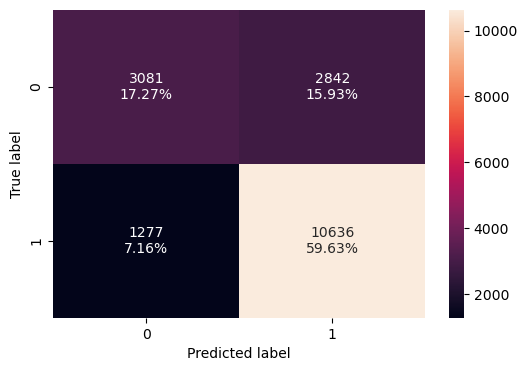

<IPython.core.display.Javascript object>

In [123]:
## let's check the performance of this model on training & testing data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

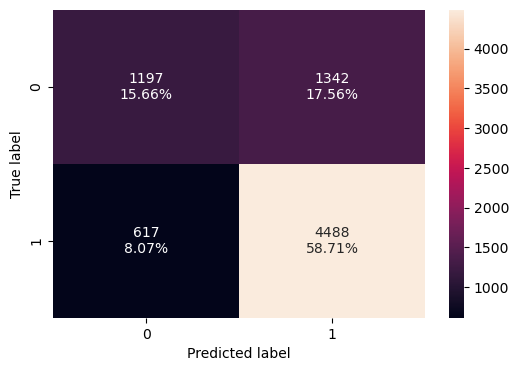

<IPython.core.display.Javascript object>

In [124]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [125]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769063,0.892806,0.789138,0.837777


<IPython.core.display.Javascript object>

In [126]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743721,0.879138,0.769811,0.82085


<IPython.core.display.Javascript object>

#### Observations
- we observe that again the model is generalized and not overfitted.
- we shoud do comparision between all models results to choose the best one.

### Creating a dataframe to list-down all the model's results

In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985030,0.995571,1.0,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.765867,0.769063
Recall,1.0,0.931923,0.985562,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.881390,0.892806
Precision,1.0,0.720067,0.991974,0.993495,1.0,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.791676,0.789138
F1,1.0,0.812411,0.988757,0.996695,1.0,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.834128,0.837777


<IPython.core.display.Javascript object>

In [129]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.664835,0.692700,0.726060,0.723182,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.745945,0.743721
Recall,0.742801,0.742801,0.766503,0.897356,0.832909,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.871694,0.879138
Precision,0.752232,0.752232,0.771795,0.744757,0.770988,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.775667,0.769811
F1,0.747487,0.747487,0.769140,0.813966,0.800753,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820882,0.820850


<IPython.core.display.Javascript object>

## Model Performance Comparison and Conclusions

#### Model performance 
- We observe that models established using all of Decision tree/tuned, bagging/tuned tend to be overfitting, so we will not consider them.
- also, we observe that models established using random forest/tuned, adaboost/tuned, GBoost/tuned, XGboost/tuned and stacking/tuned having same or close results to each others.
- so, in my point of view i see that best model is XGBoost Classifier tuned due to below:
    - have best combination of accuracy and F1 score, i.e. 0.746 & 0.821
    - have best combination of recall and precision, i.e. 0.87 & 0.776
- also as observed, It is  not always that hyperparameters improve the model perforamnce as we observed in the above models that using some hyperparameter increasing f1 score and accuracy for some models and some has no or less impact on the performance, i.e.:
    - Tuned Random Forest has better results by using hyperparameters tuning. 
    - However, using haperparameter in Tuned Adaboost classifier has no improvement on the performance.

## Actionable Insights and Recommendations

#### Insights
 - Based on our analysis, we recommend using established model 'XGboost classifier tuned' as plan A, and plan B could be either Gradient boost classifier or Tuned random forest. All of them have a good F1 score and Accuracy.
 - Based on our analysis, the below features are the most effective one that can affect the visa status which can be prioritized for shortlisting process
  - Education - (there is high possibility that visa denied if the candidate have high school, and there is also high possibility that visa approved if the candidate have Master's and doctorate degree)
  - skilled employed - ( the more candidates have experience the high possibility to get visa approved)
  - Continent/Region - (there is moderate possibility to get the visa approved if the position applied located in Europe or Asia)
  - Region( there is moderate possibility to get visa approved if the position located in Midwest/south/North America)
  - Unit of wage - (there is a moderate possibility to get the visa approved if the wage unit is per year)
 - All of the above are the major features that affect visa status.
 #### Recommendations
 - We recommend the organization to prioritize the features above while selecting the candidates. At the initial stage, they can assign these features as mandatory fields in the application, so that, in pre-screening stage, they can filter them and process those who have met the requirements in priority basis.
- They can also automate the filter process by pushing those applications have not met the criteria above to the bottom while pushing other successful application to the top for processing. in the reality, there are many online recruitments application doing the same such as NaukriGulf and indeed.com
- we believe by this way, that will support the organization to save the time and effort to shortlist the candidates who have high possibility to het the visa certified.
